# Customer Churn Telecom

Customer Churn (ou Rotatividade de Clientes, em uma tradução livre) refere-se a uma decisão tomada pelo cliente sobre o término do relacionamento comercial. Refere-se também à perda de clientes. A fidelidade do cliente e a rotatividade de clientes sempre somam 100%. Se uma empresa tem uma taxa de fidelidade de 60%, então a taxa de perda de clientes é de 40%. De acordo com a
regra de lucratividade do cliente 80/20, 20% dos clientes estão gerando 80% da receita. Portanto, é muito importante prever os usuários que provavelmente abandonarão o relacionamento comercial e os fatores que afetam as decisões do cliente.

Neste projeto, o objetivo é prever o Customer Churn em uma Operadora de Telecom.

## Análise Exploratória de Dados

Nessa etapa inicial, o objetivo é visualizar os dados e extrair insights deles. Para isso serão estruturadas perguntas de negócio, que serão respondidas por meio de tabelas e gráficos.

In [75]:
# Imports da biblioteca
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.offline as pyo
from scipy.stats import chi2_contingency, ttest_ind

pyo.in

In [2]:
# Import dos dados
df = pd.read_csv("projeto4_telecom_treino.csv", index_col=0)

In [3]:
df

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,no
2,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
3,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
4,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
5,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3329,AZ,192,area_code_415,no,yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,no
3330,WV,68,area_code_415,no,no,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,no
3331,RI,28,area_code_510,no,no,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,no
3332,CT,184,area_code_510,yes,no,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,no


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3333 entries, 1 to 3333
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          3333 non-null   object 
 1   account_length                 3333 non-null   int64  
 2   area_code                      3333 non-null   object 
 3   international_plan             3333 non-null   object 
 4   voice_mail_plan                3333 non-null   object 
 5   number_vmail_messages          3333 non-null   int64  
 6   total_day_minutes              3333 non-null   float64
 7   total_day_calls                3333 non-null   int64  
 8   total_day_charge               3333 non-null   float64
 9   total_eve_minutes              3333 non-null   float64
 10  total_eve_calls                3333 non-null   int64  
 11  total_eve_charge               3333 non-null   float64
 12  total_night_minutes            3333 non-null   f

In [5]:
df.describe()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


# Análise Exploratória de Dados

Essa etapa é 

## Pergunta de negócio: Onde estão a maior parte dos clientes?

In [74]:
clientes_por_estado = df['state'].value_counts()

fig = px.choropleth(locations=clientes_por_estado.index, 
                    locationmode="USA-states", 
                    scope="usa",
                    color=clientes_por_estado.values,
                    labels = 'Quantidade de clientes',
                    color_continuous_scale="Viridis_r")

fig.update_layout(title_text = 'Quantidade de clientes por estado',
                  title_font_family="Gill Sans",
                  title_font_size = 22,
                  title_font_color="black",  
                  title_x=0.5,
                  coloraxis_colorbar=dict(title='Quantidade de clientes',
                                          titleside='right',
                                          titlefont= dict(size = 14))
                  )

fig.show()

                    

## Insight: Estados com mais clientes

Os estados com mais clientes são West Virginia, seguido de Minnesota e New York.

## Pergunta de negócio: Quantos clientes tem plano internacional?

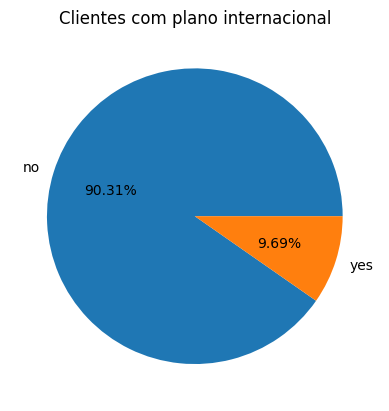

In [7]:
plano_internacional = df['international_plan'].value_counts()

plt.pie(plano_internacional.values, labels = plano_internacional.index, autopct='%1.2f%%')
plt.title('Clientes com plano internacional');

Menos de 10% dos clientes usam plano internacional.

## Pergunta de negócio: Existe diferença de Churn para clientes com plano internacional?

In [8]:
# Tabela cruzada churn x plano internacional
tabela_cruzada = pd.crosstab(df['churn'], df['international_plan'])
tabela_cruzada

international_plan,no,yes
churn,,
no,2664,186
yes,346,137


In [9]:
# Em porcentagem
tabela_cruzada_pct = tabela_cruzada / tabela_cruzada.sum()
tabela_cruzada_pct.T

churn,no,yes
international_plan,,
no,0.885050,0.114950
yes,0.575851,0.424149


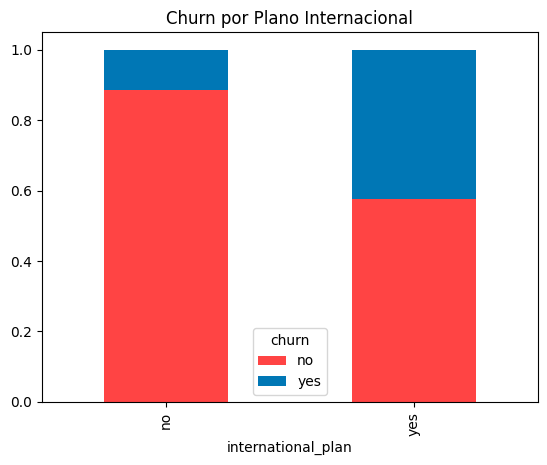

In [10]:
## Gráfico
tabela_cruzada_pct.T.plot(kind = 'bar', stacked = True, color = ['#FF4444', '#0077B5'])
plt.title('Churn por Plano Internacional');

## Insight: Clientes com plano internacional proporcionalmente cancelam mais

Apenas cerca de 11% dos clientes sem plano internacional cancelam. Já nos clientes com plano internacional esse número é mais de 40%. Mais tarde checaremos a importância dessa variável no modelo de Machine Learning.

## Pergunta de negócio: Quantos clientes tem plano internacional?

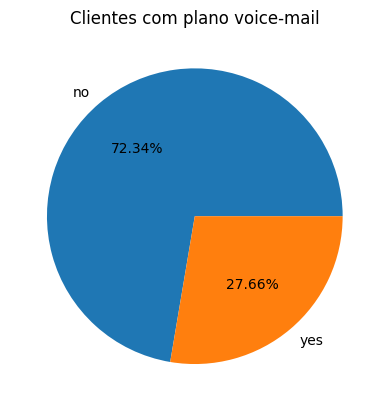

In [11]:
plano_voice_mail = df['voice_mail_plan'].value_counts()

plt.pie(plano_voice_mail.values, labels = plano_voice_mail.index, autopct='%1.2f%%')
plt.title('Clientes com plano voice-mail');

## Pergunta de negócio: Existe diferença de Churn para clientes com plano voice-mail?

In [12]:
# Tabela cruzada churn x plano internacional
tabela_cruzada2 = pd.crosstab(df['churn'], df['voice_mail_plan'])
tabela_cruzada2

# Em porcentagem
tabela_cruzada_pct2 = tabela_cruzada2 / tabela_cruzada2.sum()
tabela_cruzada_pct2.T

churn,no,yes
voice_mail_plan,,
no,0.832849,0.167151
yes,0.913232,0.086768


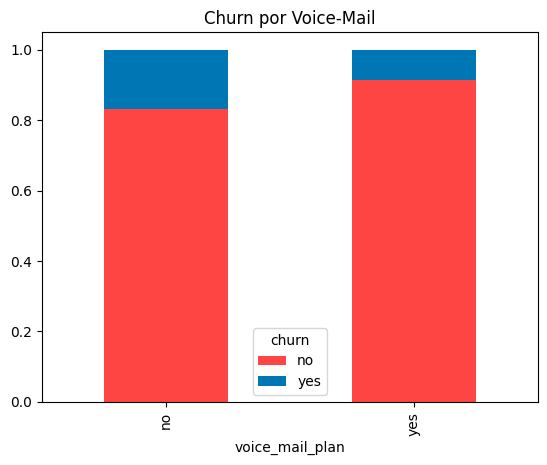

In [13]:
## Gráfico
tabela_cruzada_pct2.T.plot(kind = 'bar', stacked = True, color = ['#FF4444', '#0077B5'])
plt.title('Churn por Voice-Mail');

## Validação estatística: Teste Chi-Quadrado para Independência de Variáveis Categóricas

Apenas cerca de 9% dos clientes sem plano voice-mail cancelam. Já nos clientes com plano voice-mail esse número é de quase 17%. Mas será essa diferença estatisticamente significativa?

In [50]:
# Rodando teste Chi-Quadrado
chi2, p, dof, expected = chi2_contingency(tabela_cruzada2)

# Imrpime os resultados
print('Estatística chi-quadrado: {:.2f}'.format(chi2))
print('p-valor: {:.4f}'.format(p))
print('Graus de liberdade: {}'.format(dof))
print('Frequências esperadas:\n', expected)

Estatística chi-quadrado: 34.13
p-valor: 0.0000
Graus de liberdade: 1
Frequências esperadas:
 [[2061.61116112  788.38883888]
 [ 349.38883888  133.61116112]]


## Insight: A diferença de Churn é significativa para clientes com plano Voice-Mail

Ao nível de significância 5%, o valor-p do teste Chi Quadrado foi menor que 0,05, logo o teste Chi Quadrado revelou que a diferença de Churn é estatísticamente significativa para clientes com plano Voice-Mail. Mais tarde será verificada a importância dessa variável no Modelo de Machine Learning.

## Análise Univariada das Variáveis Numéricas

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3333 entries, 1 to 3333
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          3333 non-null   object 
 1   account_length                 3333 non-null   int64  
 2   area_code                      3333 non-null   object 
 3   international_plan             3333 non-null   object 
 4   voice_mail_plan                3333 non-null   object 
 5   number_vmail_messages          3333 non-null   int64  
 6   total_day_minutes              3333 non-null   float64
 7   total_day_calls                3333 non-null   int64  
 8   total_day_charge               3333 non-null   float64
 9   total_eve_minutes              3333 non-null   float64
 10  total_eve_calls                3333 non-null   int64  
 11  total_eve_charge               3333 non-null   float64
 12  total_night_minutes            3333 non-null   f

In [20]:
numeric_vars = [var for var in df.columns if df[var].dtype != 'object']
numeric_vars

['account_length',
 'number_vmail_messages',
 'total_day_minutes',
 'total_day_calls',
 'total_day_charge',
 'total_eve_minutes',
 'total_eve_calls',
 'total_eve_charge',
 'total_night_minutes',
 'total_night_calls',
 'total_night_charge',
 'total_intl_minutes',
 'total_intl_calls',
 'total_intl_charge',
 'number_customer_service_calls']

In [27]:
# Checando quantidade de variáveis
len(numeric_vars)

15

In [34]:
df[numeric_vars].iloc[:,0]

1       128
2       107
3       137
4        84
5        75
       ... 
3329    192
3330     68
3331     28
3332    184
3333     74
Name: account_length, Length: 3333, dtype: int64

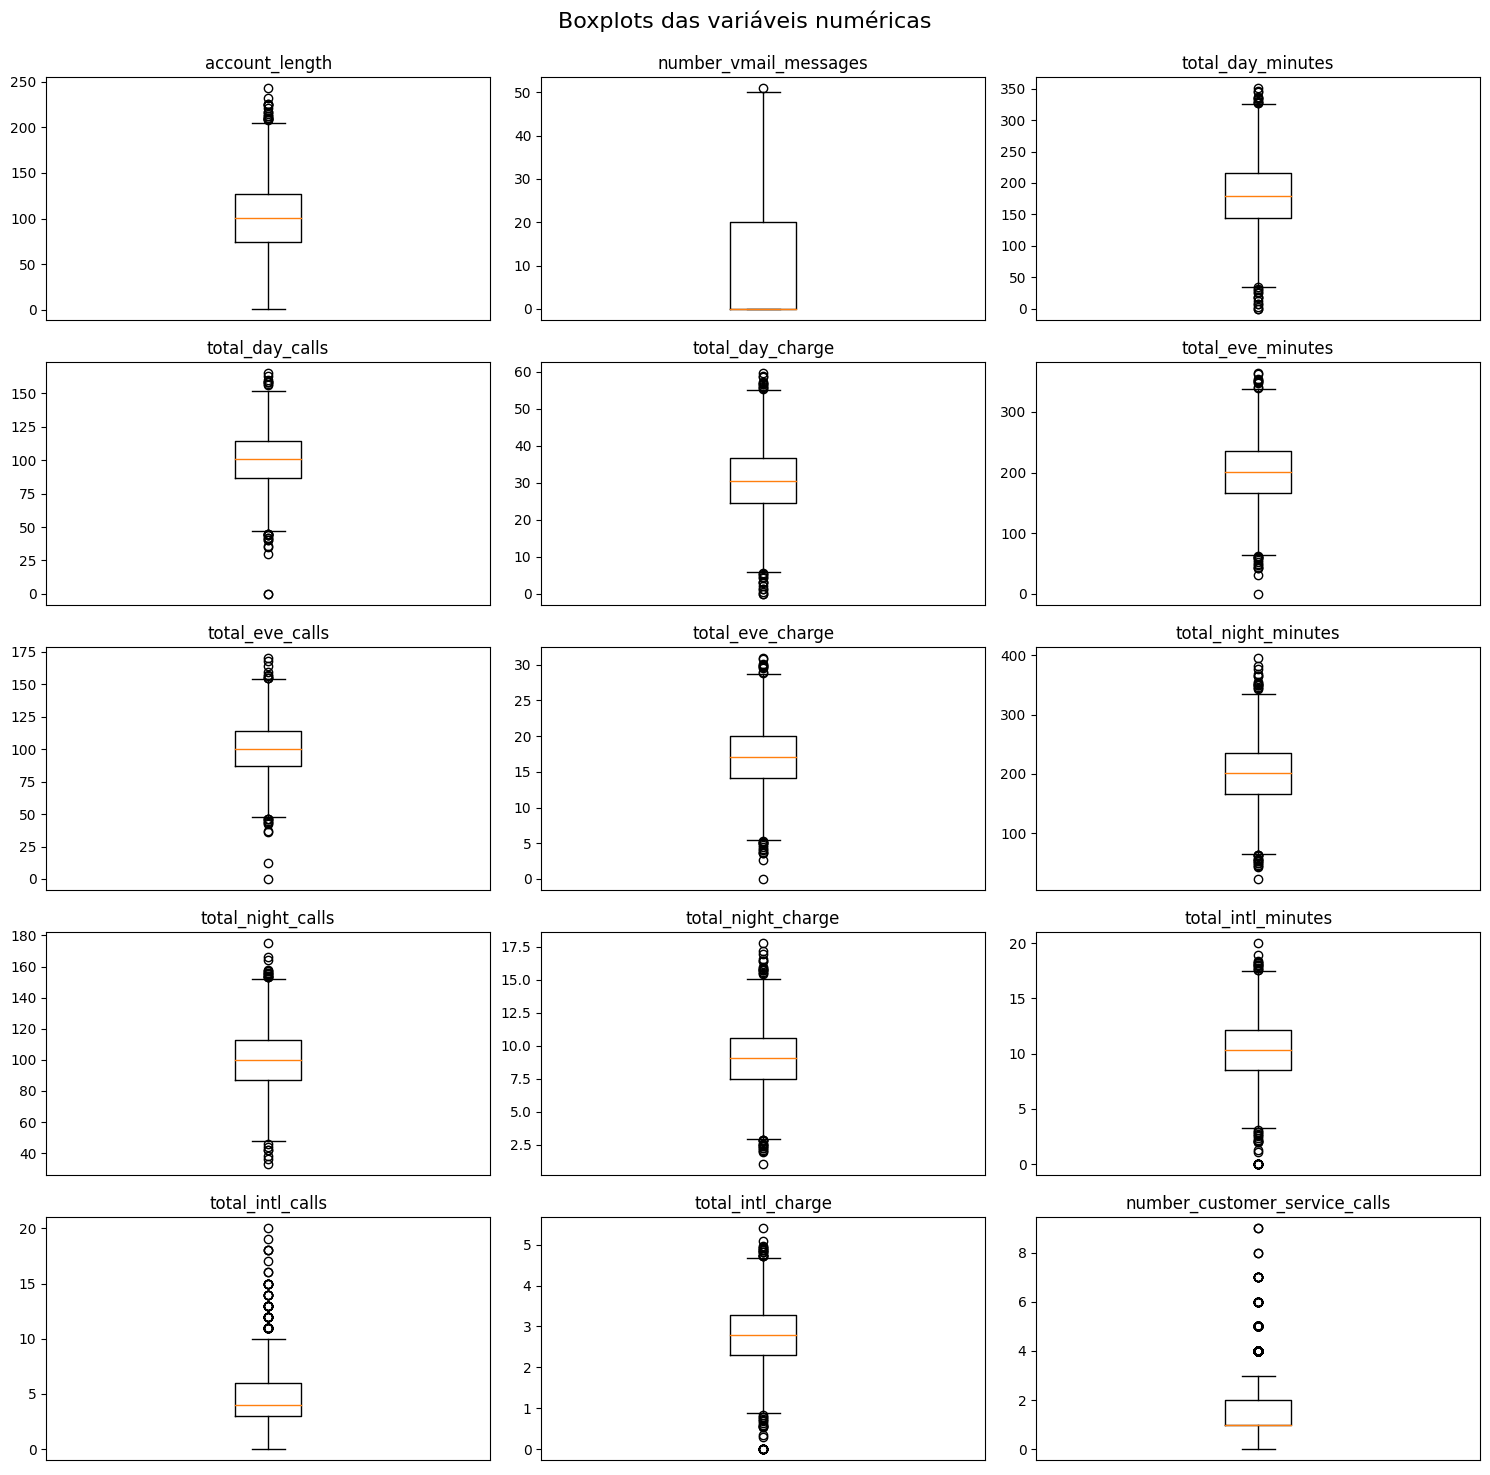

In [41]:
# Create a figure and 15 subplots
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(15, 15))

# Flatten the 2D array of subplots into a 1D array
axes = axes.flatten()

# Create a boxplot for each subplot
for i, ax in enumerate(axes):
    ax.boxplot(df[numeric_vars].iloc[:,i])
    ax.set_title(f'{numeric_vars[i]}')
    ax.set_xticks([])

# Set the overall title of the figure
fig.suptitle('Boxplots das variáveis numéricas\n', fontsize=16)

# Adjust the spacing between the subplots
fig.tight_layout()

# Show the plot
plt.show()

## Insight: A maioria das variáveis numéricas tem vários outliers

number_vmail_messages tem apenas um outlier. As outras variavéis todas tem vários outliers. Isso será melhor investigado no pré-processamento.

## Pergunta de negócio: Quanto tempo em média clientes utilizam o serviço antes de cancelar?

In [58]:
# Média geral
df['account_length'].mean()

101.06480648064806

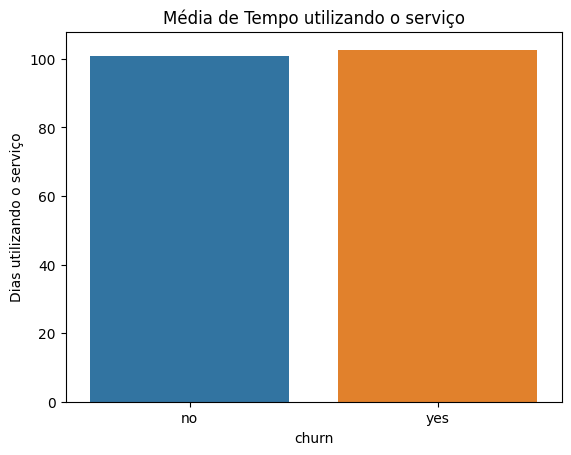

In [59]:
# Média por churn
tempo_servico = df.groupby('churn')['account_length'].mean()

sns.barplot(x = tempo_servico.index, y = tempo_servico.values)
plt.title('Média de Tempo utilizando o serviço')
plt.ylabel('Dias utilizando o serviço');

## Insight: Os clientes usam o serviço por em média 100 dias

Clientes utilizam o serviço em média por 100 dias. Pode-se realizar alguma promoção de plano semestral ou anual para manter os clientes por mais tempo.

## Pergunta de negócio: Clientes que cancelam fazem mais ligações para Customer Service?

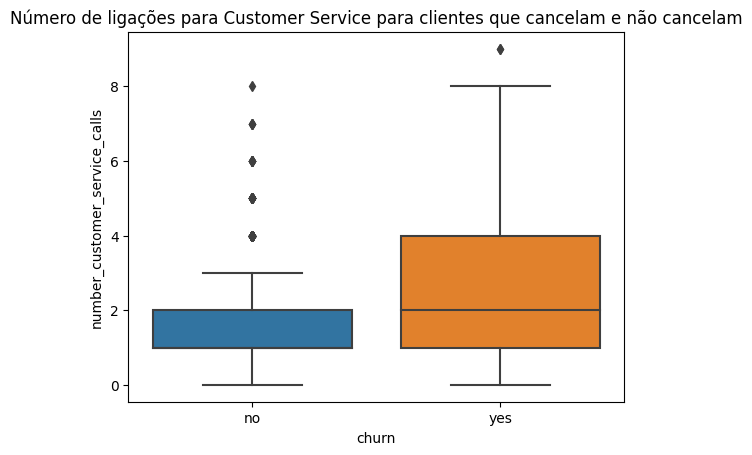

In [43]:
sns.boxplot(data = df, x = 'churn', y = 'number_customer_service_calls')
plt.title('Número de ligações para Customer Service para clientes que cancelam e não cancelam');

## Validação estatística:

Aparentemente, clientes que cancelam fazem mais ligações ao customer service. Vamos validar estatísticamente se isto é verdadeiro.

In [45]:
customer_service_calls = pd.DataFrame()

In [47]:
customer_service_calls_clientes_churn = df[df['churn'] == 'yes']['number_customer_service_calls']
customer_service_calls_clientes_churn

11      4
16      4
22      5
34      1
42      0
       ..
3302    0
3305    4
3321    4
3323    4
3324    5
Name: number_customer_service_calls, Length: 483, dtype: int64

In [48]:
customer_service_calls_clientes_no_churn = df[df['churn'] == 'no']['number_customer_service_calls']
customer_service_calls_clientes_no_churn

1       1
2       1
3       0
4       2
5       3
       ..
3329    2
3330    3
3331    2
3332    2
3333    0
Name: number_customer_service_calls, Length: 2850, dtype: int64

In [52]:
# Teste t Welch - Variâncias diferentes
t_stat, p_val = ttest_ind(customer_service_calls_clientes_churn, customer_service_calls_clientes_no_churn, equal_var=False)

# Print results
print("Estatística teste-t: {:.3f}".format(t_stat))
print("p-valor: {:.3f}".format(p_val))

Estatística teste-t: 8.955
p-valor: 0.000


## Insight: A diferença da média de número de ligações para Customer Service é estatísticamente significativa entre clientes que cancelam e que não cancelam

Ao nível de significância 5%, o valor-p do teste t foi menor que 0,05, logo há evidências estatísticas de que a média de número de ligações para Customer Service é diferente para clientes que cancelam e que não cancelam.

## Pergunta de negócio: Quais as médias de minutos, ligações e cobrança para os 3 turnos e para planos internacionais?

In [64]:
totals = [col for col in df.columns if col.startswith('total')]

minutos = [col for col in totals if col.endswith('minutes')]
calls = [col for col in totals if col.endswith('calls')]
charge = [col for col in totals if col.endswith('charge')]

df[totals].mean()

total_day_minutes      179.775098
total_day_calls        100.435644
total_day_charge        30.562307
total_eve_minutes      200.980348
total_eve_calls        100.114311
total_eve_charge        17.083540
total_night_minutes    200.872037
total_night_calls      100.107711
total_night_charge       9.039325
total_intl_minutes      10.237294
total_intl_calls         4.479448
total_intl_charge        2.764581
dtype: float64

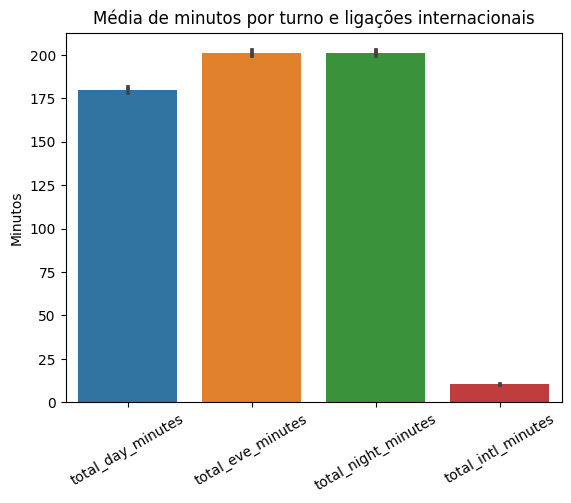

In [69]:
# Gráfico - Minutos
sns.barplot(data = df[minutos])
plt.title('Média de minutos por turno e ligações internacionais')
plt.ylabel('Minutos')
plt.xticks(rotation=30);

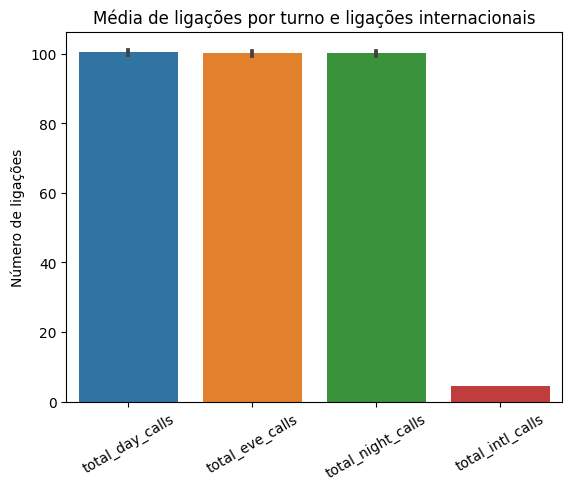

In [72]:
# Gráfico - Ligações
sns.barplot(data = df[calls])
plt.title('Média de ligações por turno e ligações internacionais')
plt.ylabel('Número de ligações')
plt.xticks(rotation=30);

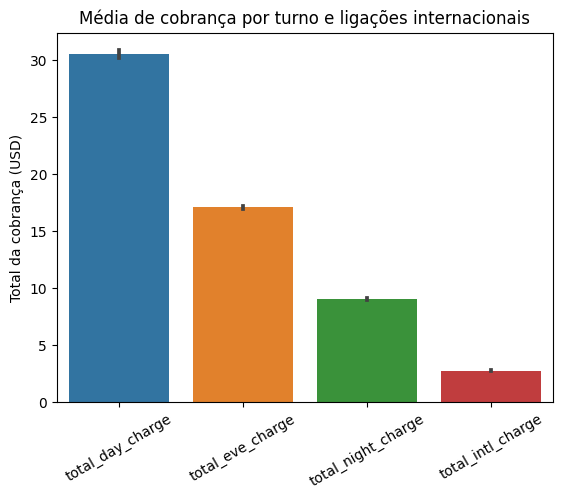

In [73]:
# Gráfico - Cobrança
sns.barplot(data = df[charge])
plt.title('Média de cobrança por turno e ligações internacionais')
plt.ylabel('Total da cobrança (USD)')
plt.xticks(rotation=30);

## Insights: A média de número de ligações é igual por turno, mas o tempo em minutos é menor durante o dia. No entanto, a cobrança por ligações durante o dia é maior.

# Conclusão

Por meio da análise exploratória pode-se extrair diversos insights dos dados apresentados. Com essas considerações em mente, iremos para a próxima etapa que é a de pré-processamento dos dados.